In [1]:
import torch
from torch import nn, optim
from jcopdl.callback import Callback, set_config

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

# Dataset & Dataloader

In [2]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

bs = 128

train_transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.ToTensor()
])

train_set = datasets.ImageFolder('Dataset/train/', transform=train_transform)
trainloader = DataLoader(train_set, batch_size=bs, shuffle=True, num_workers=4)

test_set = datasets.ImageFolder('Dataset/test/', transform=test_transform)
testloader = DataLoader(test_set, batch_size=bs, shuffle=True)

In [5]:
feature, target = next(iter(trainloader))
feature.shape

torch.Size([128, 1, 28, 28])

In [42]:
train_set.classes

['Ankle boot',
 'Bag',
 'Coat',
 'Dress',
 'Pullover',
 'Sandal',
 'Shirt',
 'Sneaker',
 'T-shirt or Top',
 'Trouser']

# Architecture and Configuration

In [46]:
from jcopdl.layers import linear_block
class NN(nn.Module):
    def __init__(self, input_size, n1, n2, output_size, dropout = 0.2):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Flatten(),
            linear_block(input_size, n1, dropout = dropout),
            linear_block(n1, n2, dropout = dropout),
            linear_block(n2, output_size, activation= 'lsoftmax')
        )
        
    def forward(self, x):
        return self.fc(x)

In [45]:
config = set_config({
    "input_size": 784,
    "n1": 256,
    "n2": 64,
    "output_size": len(train_set.classes),
    "dropout": 0.2
})

# Training Preparation

In [20]:
model = NN(config.input_size, config.n1, config.n2, config.output_size, config.dropout).to(device)
criterion = nn.NLLLoss()
optimizer = optim.AdamW(model.parameters(), lr = 0.001 )
callback = Callback(model, config, outdir = 'model')

# Training

In [21]:
from tqdm.auto import tqdm

def loop_fn(mode, dataset, dataloader, model, criterion, optimizer, device):
    if mode == "train":
        model.train()
    elif mode == "test":
        model.eval()
    cost = correct = 0
    for feature, target in tqdm(dataloader, desc=mode.title()):
        feature, target = feature.to(device), target.to(device)
        output = model(feature)
        loss = criterion(output, target)
        
        if mode == "train":
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        cost += loss.item() * feature.shape[0]
        correct += (output.argmax(1) == target).sum().item()
    cost = cost / len(dataset)
    acc = correct / len(dataset)
    return cost, acc



Epoch     1
Train_cost  = 0.7178 | Test_cost  = 0.4651 | Train_score = 0.7462 | Test_score = 0.8326 |




Epoch     2
Train_cost  = 0.4708 | Test_cost  = 0.3961 | Train_score = 0.8338 | Test_score = 0.8540 |




Epoch     3
Train_cost  = 0.4180 | Test_cost  = 0.3696 | Train_score = 0.8499 | Test_score = 0.8649 |




Epoch     4
Train_cost  = 0.3887 | Test_cost  = 0.3601 | Train_score = 0.8600 | Test_score = 0.8679 |




Epoch     5
Train_cost  = 0.3673 | Test_cost  = 0.3780 | Train_score = 0.8683 | Test_score = 0.8597 |
==> EarlyStop patience =  1 | Best test_score: 0.8679




Epoch     6
Train_cost  = 0.3521 | Test_cost  = 0.3318 | Train_score = 0.8730 | Test_score = 0.8771 |




Epoch     7
Train_cost  = 0.3364 | Test_cost  = 0.3317 | Train_score = 0.8780 | Test_score = 0.8772 |




Epoch     8
Train_cost  = 0.3281 | Test_cost  = 0.3342 | Train_score = 0.8818 | Test_score = 0.8766 |
==> EarlyStop patience =  1 | Best test_score: 0.8772




Epoch     9
Train_cost  = 0.3178 | Test_cost  = 0.3199 | Train_score = 0.8828 | Test_score = 0.8809 |




Epoch    10
Train_cost  = 0.3109 | Test_cost  = 0.3199 | Train_score = 0.8865 | Test_score = 0.8824 |




Epoch    11
Train_cost  = 0.2983 | Test_cost  = 0.3159 | Train_score = 0.8910 | Test_score = 0.8833 |




Epoch    12
Train_cost  = 0.2940 | Test_cost  = 0.3373 | Train_score = 0.8925 | Test_score = 0.8763 |
==> EarlyStop patience =  1 | Best test_score: 0.8833




Epoch    13
Train_cost  = 0.2835 | Test_cost  = 0.3248 | Train_score = 0.8965 | Test_score = 0.8834 |




Epoch    14
Train_cost  = 0.2794 | Test_cost  = 0.3126 | Train_score = 0.8964 | Test_score = 0.8870 |




Epoch    15
Train_cost  = 0.2729 | Test_cost  = 0.3185 | Train_score = 0.8984 | Test_score = 0.8864 |
==> EarlyStop patience =  1 | Best test_score: 0.8870




Epoch    16
Train_cost  = 0.2707 | Test_cost  = 0.3193 | Train_score = 0.8998 | Test_score = 0.8860 |
==> EarlyStop patience =  2 | Best test_score: 0.8870




Epoch    17
Train_cost  = 0.2599 | Test_cost  = 0.3081 | Train_score = 0.9047 | Test_score = 0.8871 |




Epoch    18
Train_cost  = 0.2523 | Test_cost  = 0.3072 | Train_score = 0.9073 | Test_score = 0.8877 |




Epoch    19
Train_cost  = 0.2529 | Test_cost  = 0.3110 | Train_score = 0.9073 | Test_score = 0.8905 |




Epoch    20
Train_cost  = 0.2470 | Test_cost  = 0.3045 | Train_score = 0.9083 | Test_score = 0.8915 |


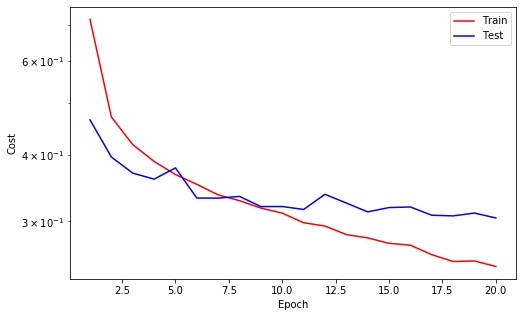

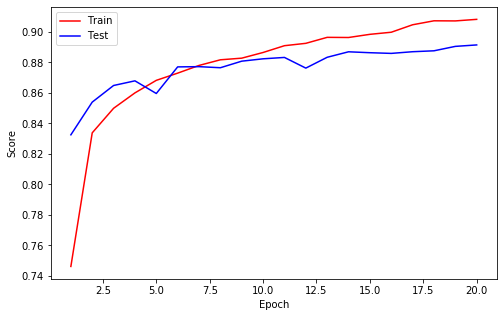



Epoch    21
Train_cost  = 0.2403 | Test_cost  = 0.3116 | Train_score = 0.9106 | Test_score = 0.8914 |
==> EarlyStop patience =  1 | Best test_score: 0.8915




Epoch    22
Train_cost  = 0.2406 | Test_cost  = 0.3064 | Train_score = 0.9106 | Test_score = 0.8896 |
==> EarlyStop patience =  2 | Best test_score: 0.8915




Epoch    23
Train_cost  = 0.2347 | Test_cost  = 0.3120 | Train_score = 0.9126 | Test_score = 0.8900 |
==> EarlyStop patience =  3 | Best test_score: 0.8915




Epoch    24
Train_cost  = 0.2304 | Test_cost  = 0.3227 | Train_score = 0.9147 | Test_score = 0.8873 |
==> EarlyStop patience =  4 | Best test_score: 0.8915




Epoch    25
Train_cost  = 0.2277 | Test_cost  = 0.3187 | Train_score = 0.9143 | Test_score = 0.8912 |
==> EarlyStop patience =  5 | Best test_score: 0.8915
==> Execute Early Stopping at epoch: 25 | Best test_score: 0.8915
==> Best model is saved at model


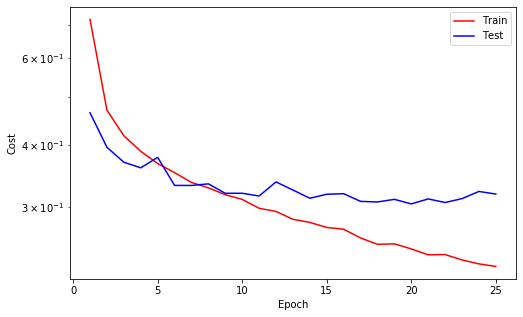

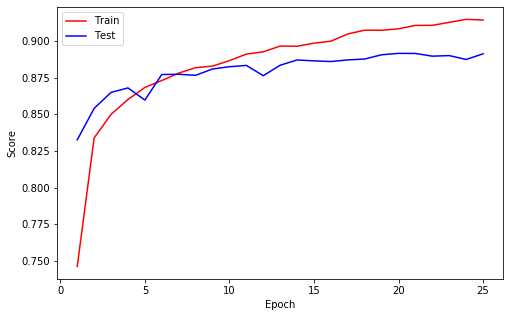

In [22]:
while True:
    train_cost, train_score = loop_fn("train", train_set, trainloader, model, criterion, optimizer, device)
    with torch.no_grad():
        test_cost, test_score = loop_fn("test", test_set, testloader, model, criterion, optimizer, device)
    
    # Logging
    callback.log(train_cost, test_cost, train_score, test_score)

    # Checkpoint
    callback.save_checkpoint()
        
    # Runtime Plotting
    callback.cost_runtime_plotting()
    callback.score_runtime_plotting()
    
    # Early Stopping
    if callback.early_stopping(model, monitor="test_score"):
        callback.plot_cost()
        callback.plot_score()
        break

# Load Best Model

In [58]:
weights = torch.load("model/weights_best.pth", map_location="cpu")
config = torch.load('model/configs.pth', map_location = 'cpu')

model = NN(config.input_size, config.n1, config.n2, config.output_size, config.dropout)
model.load_state_dict(weights)
model = model.to(device);

# Prediction

In [59]:
feature, target = next(iter(testloader))
feature, target = feature.to(device), target.to(device)

In [60]:
with torch.no_grad():
    model.eval()
    output = model(feature)
    preds = output.argmax(1)
preds

tensor([6, 9, 4, 1, 5, 9, 6, 2, 1, 7, 8, 6, 9, 3, 2, 1, 0, 1, 2, 1, 8, 1, 6, 7,
        6, 9, 1, 1, 3, 1, 3, 3, 4, 4, 5, 6, 7, 2, 0, 7, 9, 4, 5, 5, 7, 4, 5, 4,
        1, 4, 5, 9, 2, 6, 8, 5, 6, 7, 3, 0, 8, 3, 7, 9, 7, 1, 6, 4, 5, 1, 9, 8,
        8, 2, 7, 1, 0, 5, 5, 1, 7, 4, 8, 9, 5, 8, 1, 0, 6, 2, 2, 1, 3, 5, 9, 7,
        3, 1, 8, 9, 3, 7, 4, 2, 3, 3, 1, 9, 3, 6, 6, 0, 1, 7, 0, 8, 4, 7, 2, 8,
        8, 6, 2, 9, 7, 8, 2, 2])

In [61]:
label2cat = train_set.classes
label2cat

['Ankle boot',
 'Bag',
 'Coat',
 'Dress',
 'Pullover',
 'Sandal',
 'Shirt',
 'Sneaker',
 'T-shirt or Top',
 'Trouser']

In [62]:
with torch.no_grad():
    model.eval()
    output = model(feature)
    preds = output.argmax(1)
[label2cat[pred] for pred in preds]

['Shirt',
 'Trouser',
 'Pullover',
 'Bag',
 'Sandal',
 'Trouser',
 'Shirt',
 'Coat',
 'Bag',
 'Sneaker',
 'T-shirt or Top',
 'Shirt',
 'Trouser',
 'Dress',
 'Coat',
 'Bag',
 'Ankle boot',
 'Bag',
 'Coat',
 'Bag',
 'T-shirt or Top',
 'Bag',
 'Shirt',
 'Sneaker',
 'Shirt',
 'Trouser',
 'Bag',
 'Bag',
 'Dress',
 'Bag',
 'Dress',
 'Dress',
 'Pullover',
 'Pullover',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Coat',
 'Ankle boot',
 'Sneaker',
 'Trouser',
 'Pullover',
 'Sandal',
 'Sandal',
 'Sneaker',
 'Pullover',
 'Sandal',
 'Pullover',
 'Bag',
 'Pullover',
 'Sandal',
 'Trouser',
 'Coat',
 'Shirt',
 'T-shirt or Top',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Dress',
 'Ankle boot',
 'T-shirt or Top',
 'Dress',
 'Sneaker',
 'Trouser',
 'Sneaker',
 'Bag',
 'Shirt',
 'Pullover',
 'Sandal',
 'Bag',
 'Trouser',
 'T-shirt or Top',
 'T-shirt or Top',
 'Coat',
 'Sneaker',
 'Bag',
 'Ankle boot',
 'Sandal',
 'Sandal',
 'Bag',
 'Sneaker',
 'Pullover',
 'T-shirt or Top',
 'Trouser',
 'Sandal',
 'T-shirt or Top',
 'Bag'

## Prediction with Pics

In [65]:
import matplotlib.pyplot as plt

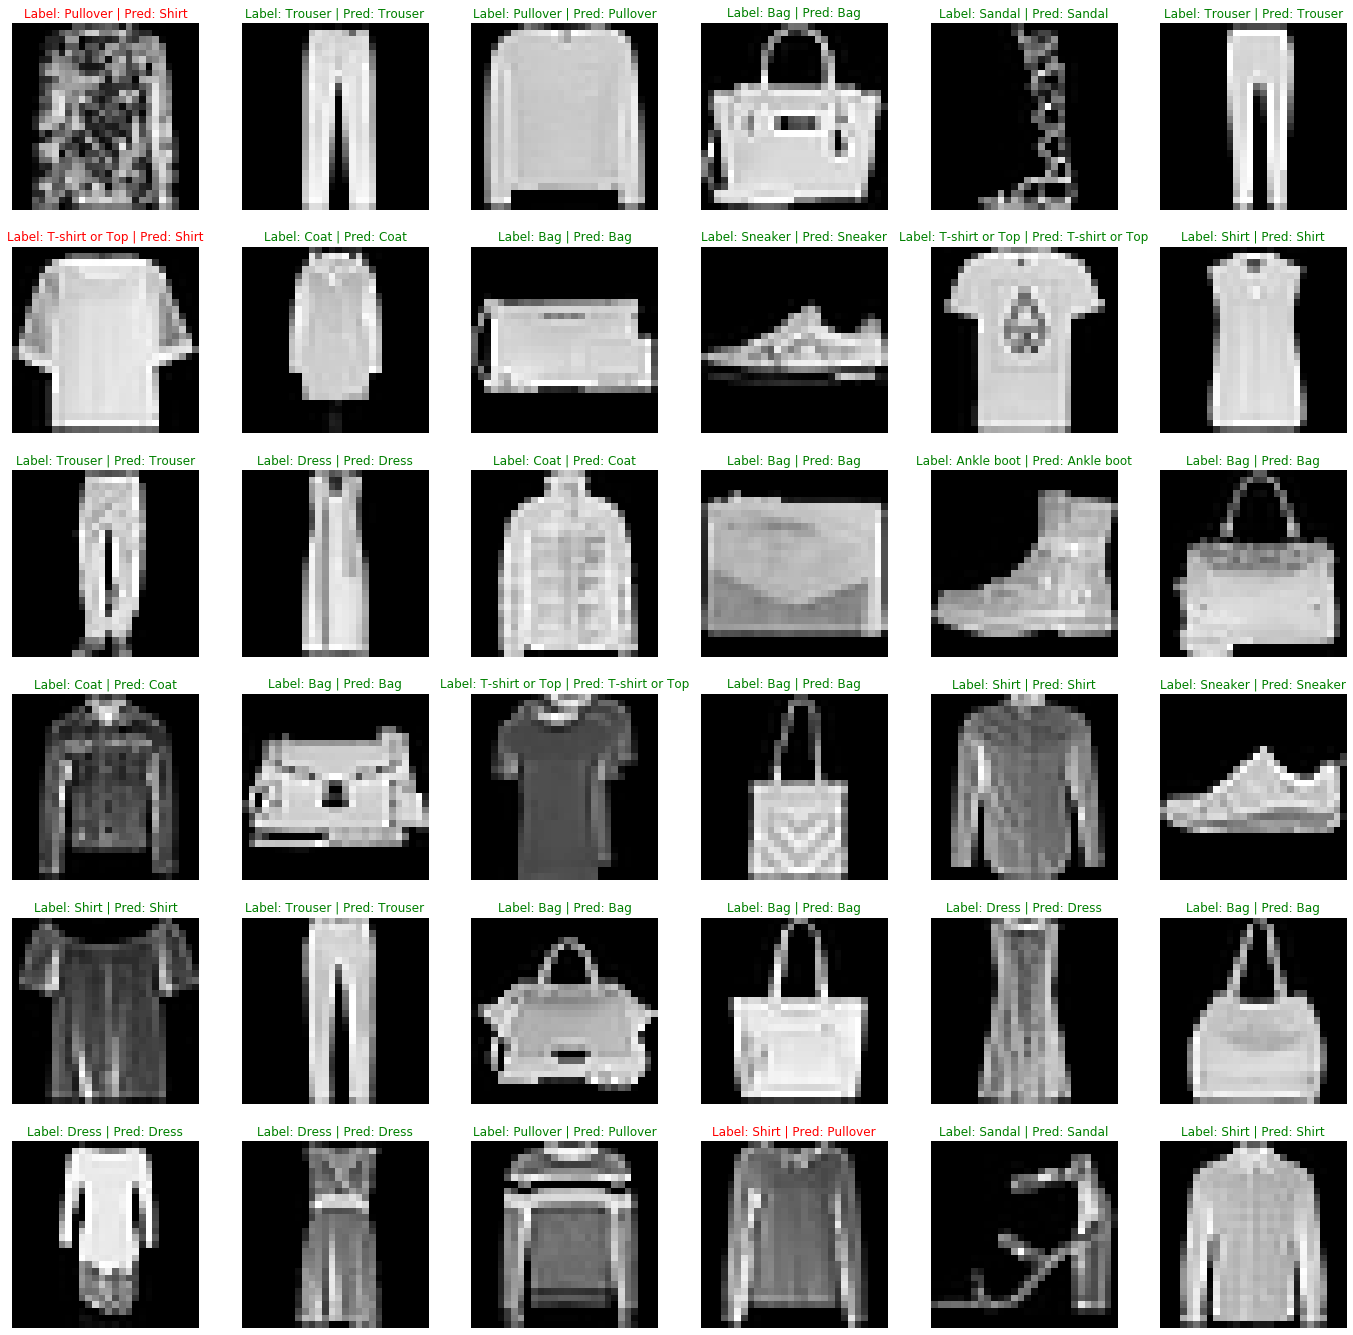

In [66]:
fig, axes = plt.subplots(6, 6, figsize = (24, 24))
for img, label, pred, ax in zip(feature, target, preds, axes.flatten()):
    ax.imshow(img.view(28, 28).cpu(), cmap = 'gray')
    font = {'color': 'r'} if label != pred else {'color': 'g'}
    label, pred = label2cat[label.item()], label2cat[pred.item()]
    ax.set_title(f'Label: {label} | Pred: {pred}', fontdict = font);
    ax.axis('off');

## The prediction is good